<!-- ---------------------------------------------------- -->
  <div class="col-sm-3 col-md-3 col-lg-3">
	<!-- logo -->  
    <div class="img-responsive">
      <img src="https://drive.google.com/uc?id=1Z28D9EByVRTyiKZspxKpRgckW7dVVnKi">    
    </div>
	<!-- logo -->	
  </div>
<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Assignment Info -->  
        <center>
        <h2>COMP9517 Computer Vision 20T2</h2>
          <h3>Lab 02</h3>
          <br>
        <strong>Student Name: Raymond Lu<br>Student Number: z5277884</strong>
    </center>
    <!-- Assignment Info -->	
  </div>
<!-- ---------------------------------------------------- -->

In [1]:
# Task1 Hint: (with sample code for the SIFT detector)
# Initialize SIFT detector, detect keypoints, store and show SIFT keypoints of original image in a Numpy array
# Define parameters for SIFT initializations such that we find only 10% of keypoints
import cv2
import matplotlib.pyplot as plt

class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector



# Task2 Hint:
# Upscale the image, compute SIFT features for rescaled image
# Apply BFMatcher with defined params and ratio test to obtain good matches, and then select and draw best 5 matches

# Task3 Hint: (with sampe code for the rotation)
# Rotate the image and compute SIFT features for rotated image
# Apply BFMatcher with defined params and ratio test to obtain good matches, and then select and draw best 5 matches
import math
import numpy as np
import sys

# image: image to rotate
# x:     x-coordinate of point we wish to rotate around
# y:     y-coordinate of point we wish to rotate around
# angle: degrees to rotate image by
#
# Returns a rotated copy of the original image
def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

# Get coordinates of center point.
#
# image:  Image that will be rotated
# return: (x, y) coordinates of point at center of image
def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2

    return center


## Task 1

### Part (a)

In [2]:
# Show image
def show_img(img):
    fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
    img_plot = plt.imshow(img.astype('uint8'))
    plt.show()

# write image in jpg format
def write_img(img_name,img):
    cv2.imwrite(img_name,img,[int(cv2.IMWRITE_JPEG_QUALITY), 80])

In [3]:
img = cv2.imread('COMP9517_20T2_Lab2_Image.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
detector = SiftDetector().get_detector(None)

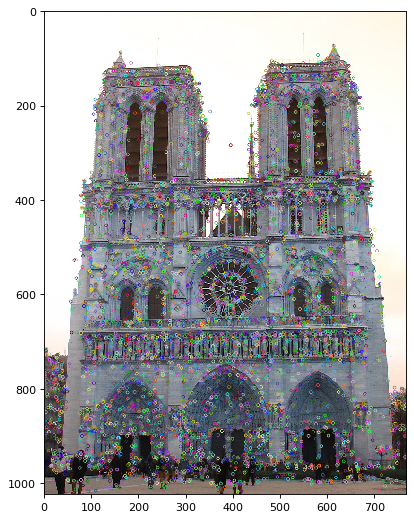

In [4]:
kp,descriptor = detector.detectAndCompute(gray,None)
new_img =cv2.drawKeypoints(img,kp,None)
show_img(new_img)
write_img("q1_part_a.jpg",new_img)

### Part (b)

From the result below, we know that the original number of keypoints is 6233. Now we are aiming to adjust the parameters to make the number of keypoints be approximately 623. We know that varying the parameter **contrastThreshold** or **nfeatures** can help reducing the number of keypoints. By setting the **nfeatures** parameter to be the target keypoint number, we can decrease the keypoint number to 10% of all default keypoints.

In [5]:
# original keypoints number
len(kp)

6233

In [6]:
target_kp_number = int(len(kp)*0.1)

In [7]:
def make_params(n_features,n_octave_layers,contrast_threshold,edge_threshold,sigma):
    params={}
    params["n_features"]=n_features
    params["n_octave_layers"]=n_octave_layers
    params["contrast_threshold"]=contrast_threshold
    params["edge_threshold"]=edge_threshold
    params["sigma"]= sigma 
    return params

params = make_params(target_kp_number,3,0.03,10,1.6)
t1_kp = SiftDetector().get_detector(params).detect(gray,None)
print("Now the keypoint number is: ",len(t1_kp))

Now the keypoint number is:  623


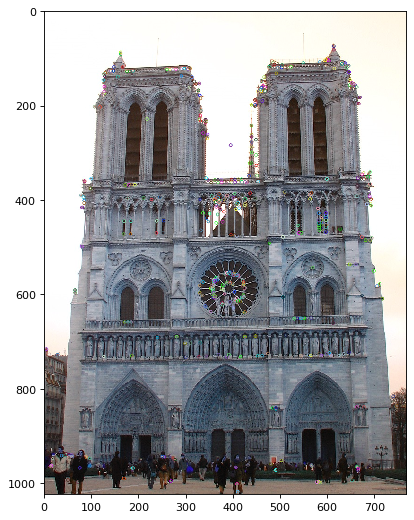

In [8]:
# t1 stands for task 1
t1_img =cv2.drawKeypoints(img,t1_kp,None)
show_img(t1_img)
write_img("q1_part_b.jpg",t1_img)

From the result above, it could be seen that the number of keypoints are far less now.

## Task 2

### Part (a) Rescaling

Resized dimensions:  (1177, 883, 3)


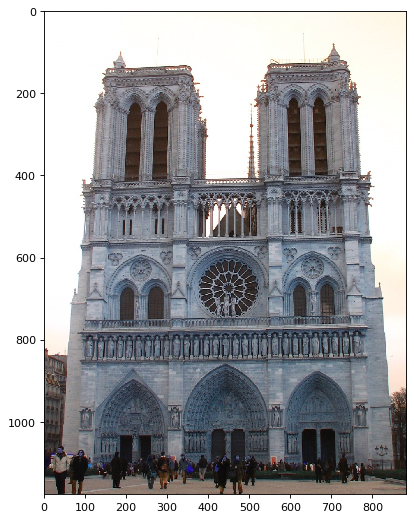

In [9]:
scale_percent = 115 # percent of original size
width = int(img.shape[1]*scale_percent/100)
height = int(img.shape[0]*scale_percent/100)
dim = (width,height)

rescaled_img = cv2.resize(img,dim)
print("Resized dimensions: ",rescaled_img.shape)
show_img(rescaled_img)

### Part (b) SIFT Extraction

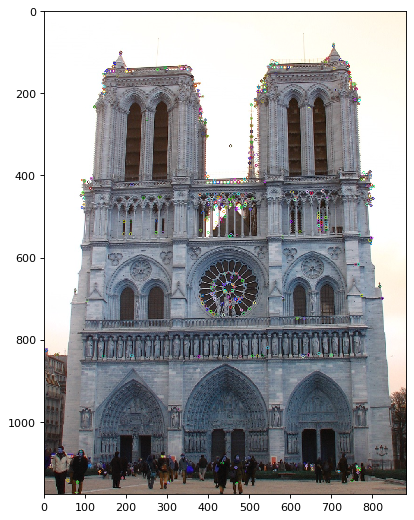

In [10]:
# r_ means rescaled
r_gray = cv2.cvtColor(rescaled_img,cv2.COLOR_BGR2GRAY)
new_detector = SiftDetector().get_detector(params)
r_kp, r_desc = new_detector.detectAndCompute(r_gray,None)
# t2_ stands for task 2
t2_b_img = cv2.drawKeypoints(rescaled_img,r_kp,None)
show_img(t2_b_img)
write_img("q2_part_b.jpg",t2_b_img)

### Part (c)

From the results above, it could be seen that keypoints of the scaled image are almost the same as the original image. This implies that the distribution of keypoints does not change with the rescaling. The reason is that rescaling does not change the pixel values as well as edges, and it does not change the local gradient vectors. Since the choice of SIFT keypoints is based on the gradient histogram, and the gradient histogram does not change in rescaling due to the reasons mentioned before. Hence, the keypoints in task 1 and task 2 have similar descriptors, namely they are the roughly the same.

### Part (d) 

#### Brute Force Matching

In [11]:
import numpy as np

In [12]:
t1_kp,t1_desc = new_detector.detectAndCompute(gray,None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(t1_desc,r_desc,k=2)

In Ratio Test, we denote $d_{1}$ as the distance to the first nearest neighbour, $d_{2}$ as the distance to the second nearest neighbour. If $\frac{d_{1}}{d_{2}}$ is low, that means the first nearest neighbour is more characteristic than the second nearest neighbour, which means the first nearest neighbour has an ideal effect on distinguishing images.

In [13]:
# Apply ratio test proposed by D.Lowe in SIFT paper
matches.sort(key=lambda x: x[0].distance/x[1].distance)

In [14]:
good_matches = [[x[0]] for x in matches][:5]
M = max([img.shape[0],rescaled_img.shape[0]])
N = img.shape[1]+rescaled_img.shape[1]
t2_d_img = np.zeros((M,N))
t2_d_img = cv2.drawMatchesKnn(img,t1_kp,rescaled_img,r_kp,good_matches,None,
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

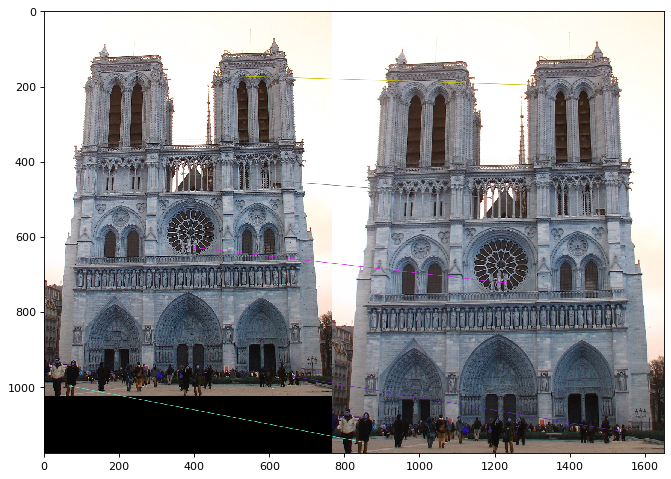

In [15]:
show_img(t2_d_img)
write_img("q2_part_d.jpg",t2_d_img)

## Task 3

### Part (a)

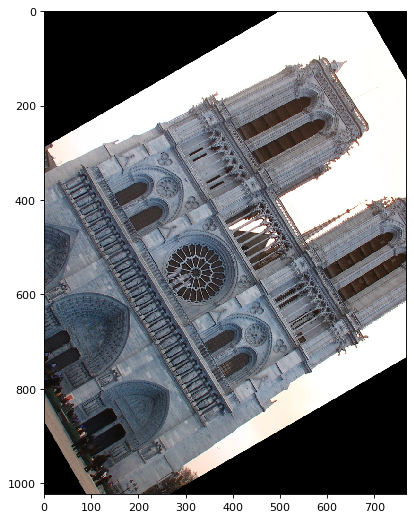

In [16]:
img_center = get_img_center(img)
t3_a_img = rotate(img,img_center[1],img_center[0],-60) # rotate the image clockwise by 60 degrees
show_img(t3_a_img)

### Part (b)

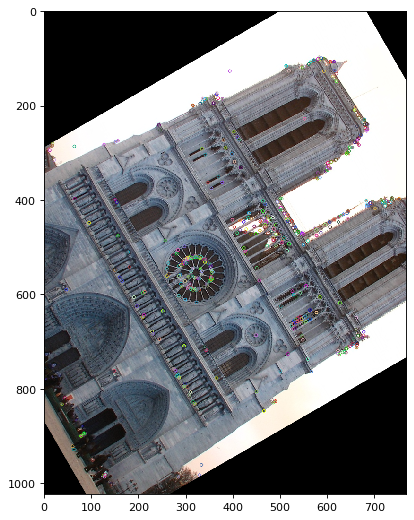

In [17]:
rotate_gray = cv2.cvtColor(t3_a_img,cv2.COLOR_BGR2GRAY)
detector = SiftDetector().get_detector(params)
t3_kp, t3_desc = detector.detectAndCompute(rotate_gray,None)
t3_b_img = cv2.drawKeypoints(t3_a_img,t3_kp,None)
show_img(t3_b_img)
write_img("q3_part_b.jpg",t3_b_img)

### Part (c)

An observation on the images generated from Question 1 Part (b) and Question 3 Part (b) reveals that keypoints of the rotated image are almost the same as the ones of the original image. This situation results in that in the rotated image, though gradient orientation changes, keypoints are still the local minima or maxima in a fixed size scale space. It should be pointed out that the size of scale space is related to the parameters for SIFT Detector construction, and as the parameters remain the same, the algorithm's choice of keypoints will not change.

### Part (d)

In [18]:
t3_matches = cv2.BFMatcher().knnMatch(t1_desc,t3_desc,k=2)
# Apply ratio test proposed by D.Lowe in SIFT paper
t3_matches.sort(key=lambda x: x[0].distance/x[1].distance)
t3_good_matches = [[x[0]] for x in t3_matches][:5]
M = max([img.shape[0],t3_a_img.shape[0]])
N = img.shape[1]+t3_a_img.shape[1]
t3_d_img = np.zeros((M,N))
t3_d_img = cv2.drawMatchesKnn(img,t1_kp,t3_a_img,t3_kp,t3_good_matches,None,
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

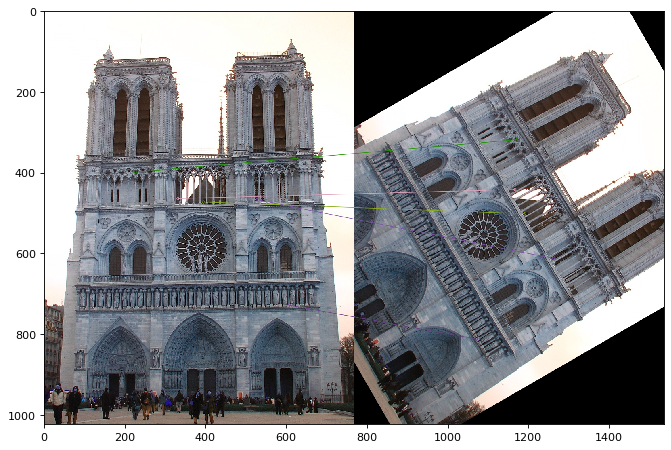

In [19]:
show_img(t3_d_img)
write_img("q3_part_d.jpg",t3_d_img)